In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_table('breast-cancer-wisconsin.data', delimiter = ',')
data.columns = ["sample_code_number", 
                "clump_thickness", 
                "uniformity_of_cell_size", 
                "uniformity_of_cell_shape", 
                "marginal_adhesion", 
                "single_epithelial_cell_size", 
                "bare_nuclei", 
                "bland_chromatin", 
                "normal_nucleoli", 
                "mitosis", 
                "classes"]
data.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,classes
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
bm = {2: "benign", 4:"malignant"}
data["classes"] = data["classes"].apply(lambda x : bm[x])

In [4]:
data = data[(data != '?').all(axis=1)]
data.head()
data['bare_nuclei'] = data['bare_nuclei'].astype(int).astype(int)

/home/erol/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
data.dtypes

sample_code_number              int64
clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                     int64
bland_chromatin                 int64
normal_nucleoli                 int64
mitosis                         int64
classes                        object
dtype: object

In [6]:
data.isna().sum()

sample_code_number             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitosis                        0
classes                        0
dtype: int64

In [7]:
data.isnull().sum()

sample_code_number             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitosis                        0
classes                        0
dtype: int64

In [8]:
data.describe()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis
count,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,1.076833e+06,4.441349,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106
std,6.210926e+05,2.822751,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.774540e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171820e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238741e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


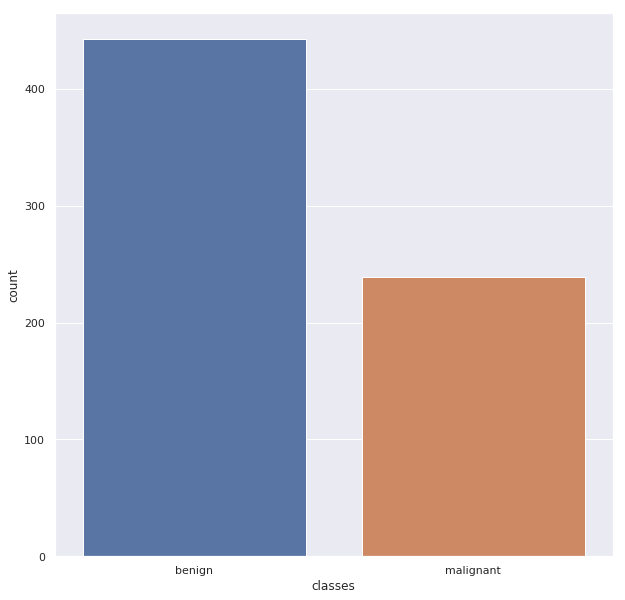

In [9]:
plt.figure(figsize = (10,10))
sns.countplot(data.classes)

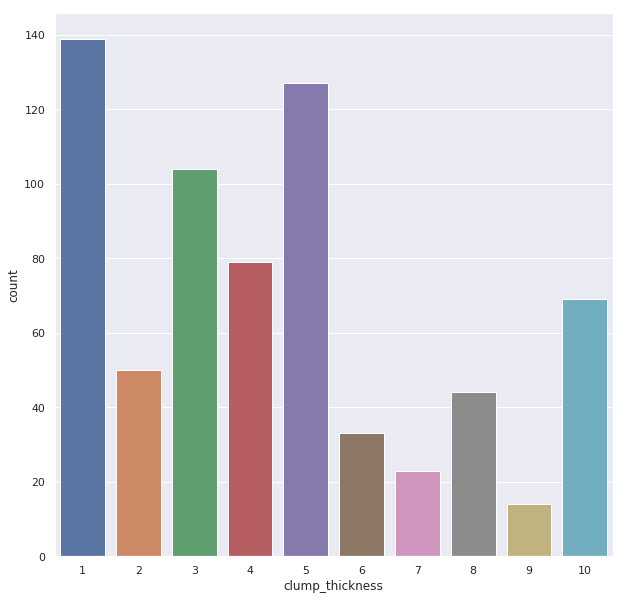

In [10]:
plt.figure(figsize = (10,10))
sns.countplot(data.clump_thickness)

# Linear Regression

In [11]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
data.iloc[:,-1] = encode.fit_transform(data.iloc[:,-1].values)
print(encode.fit_transform(data.iloc[:,-1].values))

[0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 

In [12]:
from sklearn.model_selection import train_test_split

y = data.classes.values
X = data.drop(['sample_code_number', 'classes'], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.30,
                                                    random_state = 0)



In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred = regressor.predict(X_test)
y_pred

array([ 3.28194647e-01, -6.89594769e-02,  1.00695464e+00, -5.98026434e-02,
       -5.40503915e-02,  9.74829243e-01,  1.27444321e-01,  8.12892831e-02,
        1.08432564e-02,  7.48541223e-01,  3.98248974e-01,  3.03307585e-02,
        9.74960900e-01, -1.70251508e-02, -6.43810601e-02,  1.12763318e+00,
        1.17402037e+00,  9.46546811e-01, -6.43810601e-02,  6.76995744e-01,
        1.11930307e+00,  1.12806146e-01,  3.66322307e-03,  2.43940926e-01,
        8.04959499e-01,  3.29594118e-02,  4.78684971e-02,  6.54502368e-02,
        1.08432564e-02,  8.46820324e-03, -6.43810601e-02,  6.54062358e-02,
        1.06208247e+00,  7.10076086e-01,  3.29594118e-02, -5.83752082e-02,
        6.27775825e-02,  9.16087901e-01, -3.28808478e-02, -4.94719748e-02,
       -1.24467340e-02, -3.45628894e-02,  1.54216732e-02,  7.76711022e-01,
        3.56760671e-02,  5.36477856e-02,  9.64962945e-01,  8.89623528e-01,
       -1.70251508e-02,  9.42592051e-01, -3.91413062e-02, -4.94719748e-02,
        7.95952480e-01,  

In [15]:
df_output = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df_output.head()

,Actual,Predicted
0,0,0.328195
1,0,-0.068959
2,1,1.006955
3,0,-0.059803
4,0,-0.054050


In [16]:
from sklearn.metrics import r2_score, confusion_matrix
print('Rsquared score: ', (r2_score(y_test, y_pred)*100))

Rsquared score:  84.17051962941888


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression()
logi.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred2 = logi.predict(X_test)
print(y_pred2)

[0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0]


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Prediction':y_pred2})
df.head()

,Actual,Prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [20]:
print('Rsquared score: ', (r2_score(y_test,y_pred2)*100))

Rsquared score:  86.69695003244647


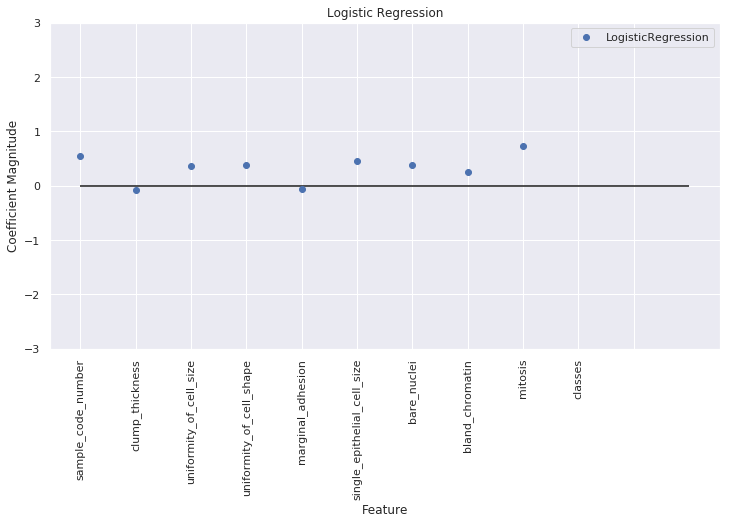

In [21]:
breast_cancer_features = [x for i,x in enumerate(data.columns) if i!=8]
 
plt.figure(figsize=(12,6))
plt.plot(logi.coef_.T, 'o', label="LogisticRegression")
plt.xticks(range(data.shape[1]), breast_cancer_features, rotation=90)
plt.hlines(0, 0, data.shape[1])
plt.ylim(-3, 3)
plt.title('Logistic Regression')
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.legend()
plt.show()

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_pred2 = rf.predict(X_test)
y_pred2

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0])

In [25]:
print(f"Breast Cancer Feature Importances: \n {format(rf.feature_importances_)} ")

Breast Cancer Feature Importances: 
 [0.0495953  0.27131062 0.27491307 0.01977387 0.08428526 0.16771353
 0.07202264 0.05527114 0.00511456] 


In [26]:
df_rf = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred2})
df_rf.head()

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [27]:
print('Accuracy score: ', (accuracy_score(y_test, y_pred2)*100))

Accuracy score:  97.5609756097561


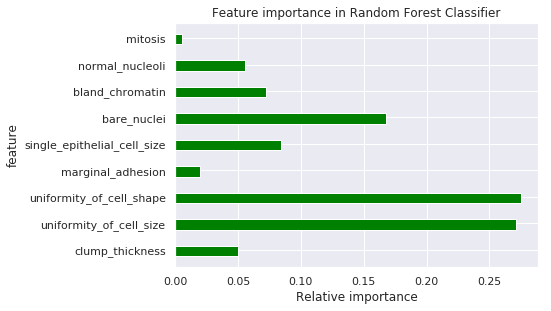

<Figure size 360x360 with 0 Axes>

In [28]:
col = ["clump_thickness", "uniformity_of_cell_size", "uniformity_of_cell_shape", "marginal_adhesion", "single_epithelial_cell_size", 
       "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitosis"]

y = rf.feature_importances_

fig, ax = plt.subplots()
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title("Feature importance in Random Forest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

In [29]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[136,   2],
       [  3,  64]])

In [30]:
matrix = pd.DataFrame(np.array(cm), columns = ['Benign', 'Malignant'],
                     index = ['Benign', 'Malignant'])
print(matrix)

           Benign  Malignant
Benign        136          2
Malignant       3         64


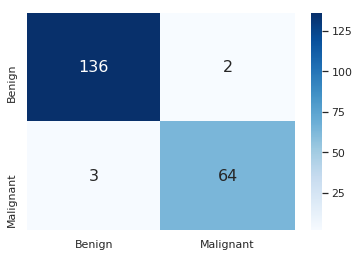

In [31]:
sns.heatmap(matrix, annot = True, annot_kws = {'size':16}, fmt = 'g', cmap = 'Blues')